In [7]:
from openai import OpenAI
import pandas as pd

# Initialize the OpenAI client
client = OpenAI()

df = pd.read_csv('nouns.csv')

# Define a translation function using the OpenAI API
def translate(noun):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are an expert in Moroccan Darija dialect and in translating Darija to English."+
             "Purpose of the translation: To study the accuracy of GPT API on Darija." +
             "Target audience: Computational linguists."
             },
            {"role": "user", "content": "Translate the provided Moroccan Darija dialect noun into English using word-by-word translation."             },
            {"role": "assistant", "content": "OK, I understand. I am ready to translate to English."},

            {"role": "user", "content": "كاضو"},
            {"role": "assistant", "content": "gift"},
#            {"role": "user", "content": "ميكا"},
#            {"role": "assistant", "content": "plastic"},
#            {"role": "user", "content": "كسوة"},
#            {"role": "assistant", "content": "dress"},
            {"role": "user", "content":  f'{noun}' }
        ],
        temperature=0.1  # Deterministic responses
    )
    return completion.choices[0].message.content

# Apply the translation function to the 'darija_ar' column
df['noun'] = df['darija_ar'].apply(translate)

# Display or save the resulting DataFrame
print(df)


               n1          n2         n3  darija_ar          eng  \
0           9ahwa        9hwa      9ehwa       قهوة       coffee   
1           korsi        krsi        NaN       كرسي        chair   
2           tabla        tbla        NaN       طبلة        table   
3             kas         NaN        NaN        كاس        glass   
4              ma         lma        NaN        ماء        water   
...           ...         ...        ...        ...          ...   
1323  lizikottour  lizikotour  lizikotor  ليزيكوتور   headphones   
1324     matiryal    mataryan   materiel   ماتيريال     hardware   
1325      portabl    portable        NaN    پورتابل   cell phone   
1326       maw3id      mou3id    maou3id       موعد  appointment   
1327       reveil       revey     rrevey      ريفاي        alarm   

                                                   noun  
0                                                coffee  
1                                                 chair  
2        

In [8]:
import matplotlib.pyplot as plt
from nltk.corpus import wordnet as wn
from sentence_transformers import SentenceTransformer, util

model_name = 'bert-base-nli-mean-tokens'
# Load a pre-trained SentenceTransformer model
model = SentenceTransformer(model_name)


transl = df['noun']
eng = df['eng']


#embedding= model.encode(eng[0])
#embedding2 = model.encode(transl[0])
#similarity = util.pytorch_cos_sim(embedding, embedding2)
#print(similarity.item())

results = []
def evaluate_pairs(transl, eng, threshold=0.7):
    for i in range(len(transl)):
        sentence1, sentence2 = transl[i], eng[i]
        embedding1 = model.encode(sentence1, convert_to_tensor=True)
        embedding2 = model.encode(sentence2, convert_to_tensor=True)
        similarity = util.pytorch_cos_sim(embedding1, embedding2)
        results.append((i+2, sentence1, sentence2, similarity.item(), similarity.item() >= threshold))
    return results
results = evaluate_pairs(transl, eng)
print(results)


c:\Users\yassi\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\yassi\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\yassi\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


[(2, 'coffee', 'coffee', 1.0000001192092896, True), (3, 'chair', 'chair', 0.9999999403953552, True), (4, 'drum', 'table', 0.4276866316795349, False), (5, 'cup', 'glass', 0.8388307094573975, True), (6, 'water', 'water', 0.9999998807907104, True), (7, 'air', 'air', 1.0000001192092896, True), (8, 'raffle', 'bottle', 0.6228699684143066, False), (9, 'house', 'house', 1.0, True), (10, 'house', 'room', 0.8197404146194458, True), (11, 'school', 'school', 1.0, True), (12, 'car', 'car', 1.0, True), (13, 'motor', 'motorcycle', 0.7319567799568176, True), (14, 'thief', 'thief', 1.0, True), (15, 'store', 'grocery seller', 0.6787445545196533, False), (16, 'boss', 'grocery seller', 0.4112856984138489, False), (17, 'tree', 'tree', 0.9999998807907104, True), (18, 'building', 'building', 0.9999998807907104, True), (19, 'shoe', 'apartment', 0.44426244497299194, False), (20, 'pot', 'garden', 0.5447741746902466, False), (21, 'sleepiness', 'sleep', 0.9049159288406372, True), (22, 'boy', 'boy', 0.999999880790

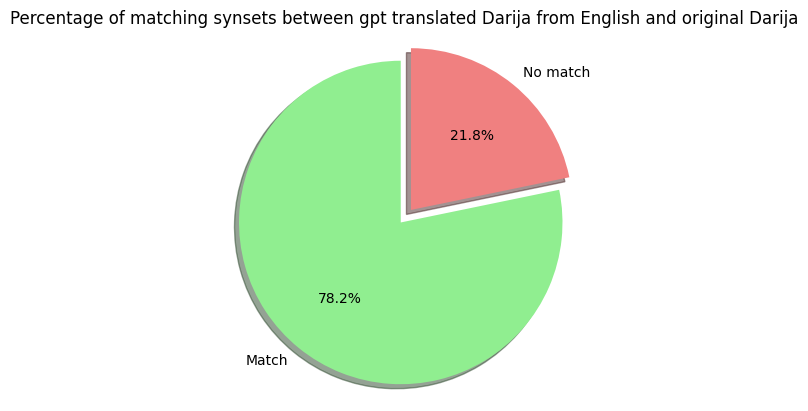

In [9]:

# Extract the last element of each tuple in the list (representing True or False values)
last_elements = [result for *_, result in results]

# Count how many comparisons are True
true_count = sum(last_elements)  # True evaluates to 1, so summing directly counts the True values

# Calculate the percentage of True vs False
total_comparisons = len(results)
false_count = total_comparisons - true_count

# Plot pie chart
labels = 'Match', 'No match'
sizes = [true_count, false_count]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Percentage of matching synsets between gpt translated Darija from English and original Darija")

plt.show()